<a href="https://colab.research.google.com/github/aligtr/ml/blob/master/Lab1_linreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Импорт основных модулей

In [2]:
# Импорт необходимых модулей 
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Настройки для визуализации
# Если используется темная тема - лучше текст сделать белым
TEXT_COLOR = 'black'

matplotlib.rcParams['figure.figsize'] = (15, 10)
matplotlib.rcParams['text.color'] = 'black'
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['axes.labelcolor'] = TEXT_COLOR
matplotlib.rcParams['xtick.color'] = TEXT_COLOR
matplotlib.rcParams['ytick.color'] = TEXT_COLOR

# Зафиксируем состояние случайных чисел
RANDOM_STATE = 42
np.random.seed(RANDOM_STATE)

# Базовая подготовка данных

> Загрузка данных



In [3]:
from sklearn.datasets import load_boston

boston_data = load_boston()
feature_data = boston_data['data']
feature_names = boston_data['feature_names']
target_data = boston_data['target']
df = pd.DataFrame(feature_data, columns=boston_data['feature_names'])
df['PRICE'] = target_data
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


> Проверка на наличие пропусков,типов данных



In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  PRICE    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


> Определение типов признаков



In [5]:
df.nunique()

CRIM       504
ZN          26
INDUS       76
CHAS         2
NOX         81
RM         446
AGE        356
DIS        412
RAD          9
TAX         66
PTRATIO     46
B          357
LSTAT      455
PRICE      229
dtype: int64

In [6]:
df['CHAS'].value_counts()
df['CHAS'] = df['CHAS'].astype(int).astype(dtype='category')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    float64 
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  PRICE    506 non-null    float64 
dtypes: category(1), float64(13)
memory usage: 52.1 KB


# Построение базовой модели

> Разделение данных



In [7]:
from sklearn.model_selection import train_test_split

# 70% - для обучения, 30% - для тестов
TRAIN_RATIO = 0.7

# X - DataFrame только с признаками (для примера берем все признаки)
X = df[feature_names]
# y - истинные значения (разметка)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE
)
# Отображение размеров выборок
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(354, 13) (354,)
(152, 13) (152,)


> Создание, обучение и проверка модели

In [8]:
from sklearn.linear_model import LinearRegression

# Создаем объект
reg = LinearRegression()
# Обучаем на выборке для обучения
reg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# При повторении кода лучшей практикой является создание функции 
#   для исключения дублирований
# Дублирование кода -> ошибки
def evaluate_regressor(reg, X, y, mode):
    y_pred = reg.predict(X)
    r2_score_value = r2_score(y, y_pred)
    rmse_score = np.sqrt(mean_squared_error(y, y_pred))
    mae_score = mean_absolute_error(y, y_pred)

    print(f'\n----- Evaluation for {mode} -----')
    print(f'  R2: {r2_score_value}')
    print(f'  RMSE: {rmse_score}')
    print(f'  MAE: {mae_score}')

evaluate_regressor(reg, X_train, y_train, 'train')
evaluate_regressor(reg, X_test, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.356826782168207

----- Evaluation for test -----
  R2: 0.7112260057484874
  RMSE: 4.638689926172867
  MAE: 3.1627098714574537


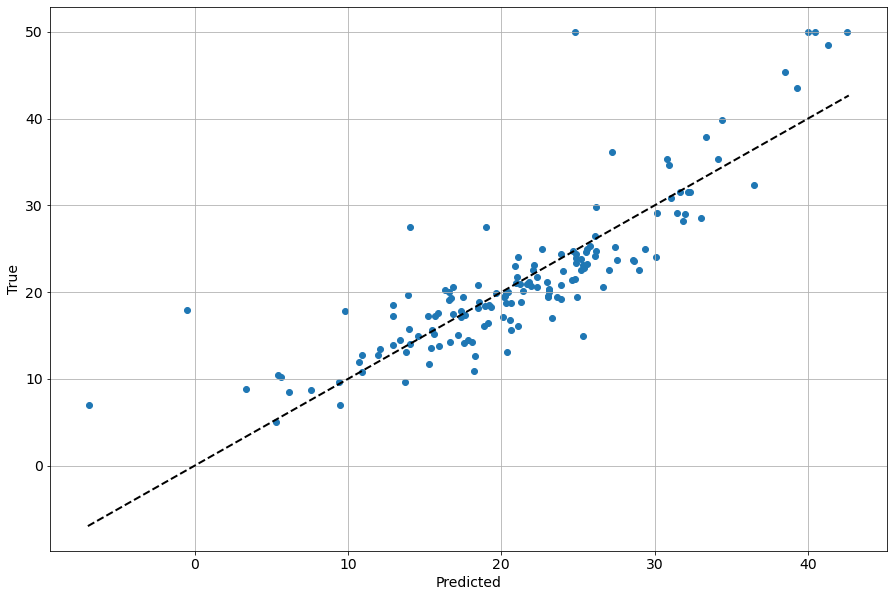

In [10]:
def draw_predictions_plot(y_pred, y_true):
    plt.scatter(y_pred, y_true)
    line_pnts = np.linspace(np.amin(y_pred)-0.1, np.amax(y_pred)+0.1, 1000)
    plt.plot(line_pnts, line_pnts, 'k--', lw=2)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.grid()

y_pred = reg.predict(X_test)
draw_predictions_plot(y_pred, y_test)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


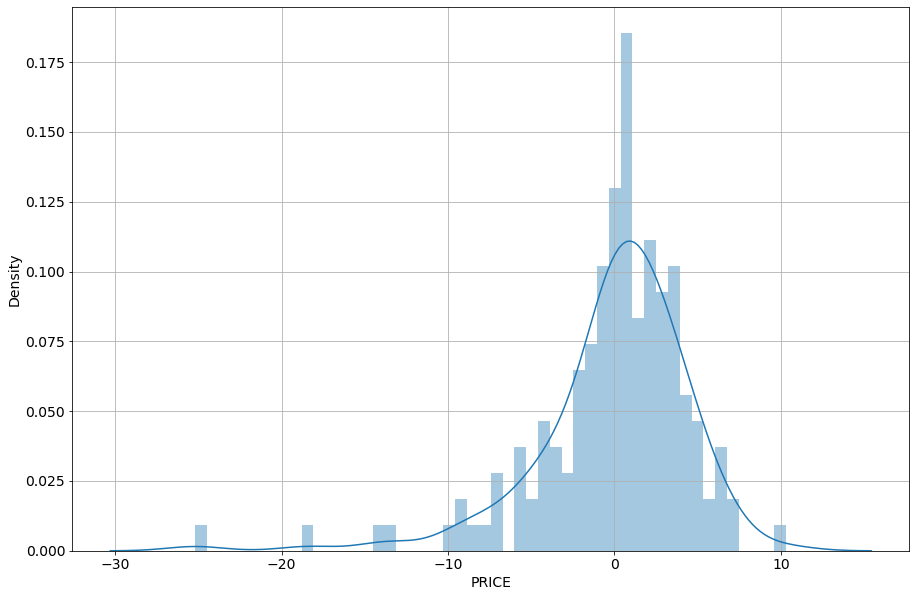

In [11]:
y_residuals = y_pred-y_test
sns.distplot(y_residuals, bins=50)
plt.grid()

# Расширенный анализ данных

> Оценка корреляции



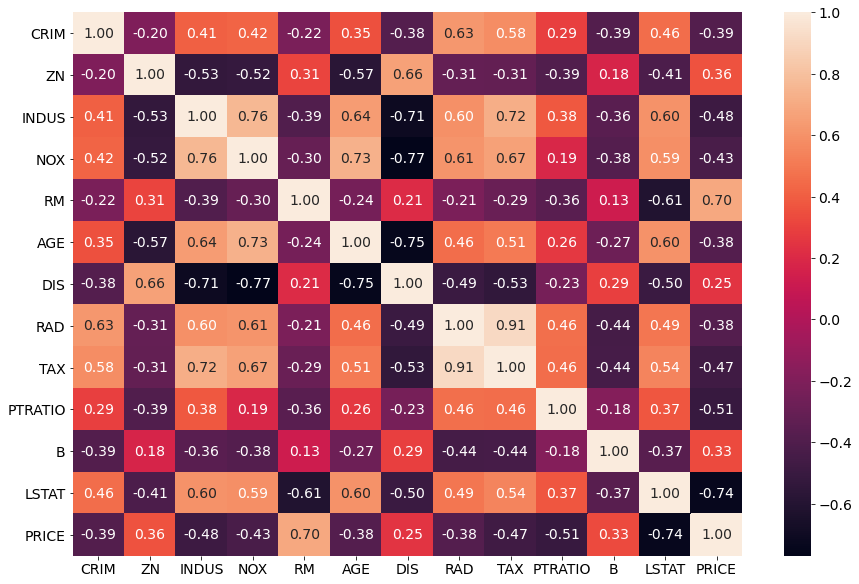

In [12]:
features = ['CRIM',	'ZN',	'INDUS',	'NOX',	'RM',	'AGE',	'DIS',	'RAD',	'TAX',	'PTRATIO',	'B',	'LSTAT', 'PRICE']
correlation_mtrx = df[features].corr()
correlation_mtrx
sns.heatmap(correlation_mtrx, annot=True, fmt='.2f')

> Оценка распределений



/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


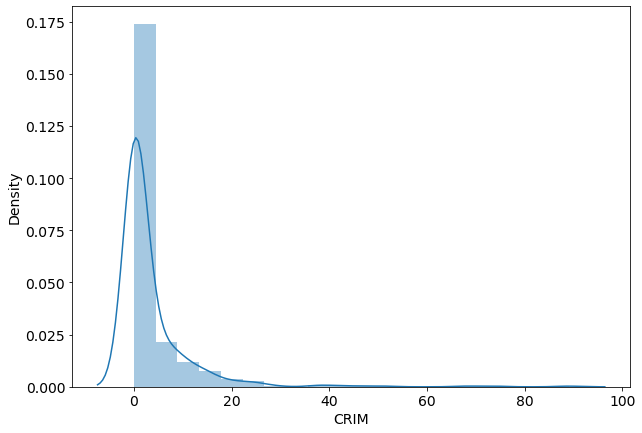

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


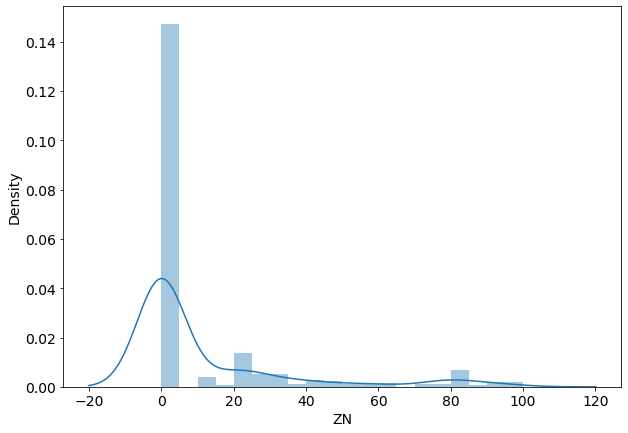

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


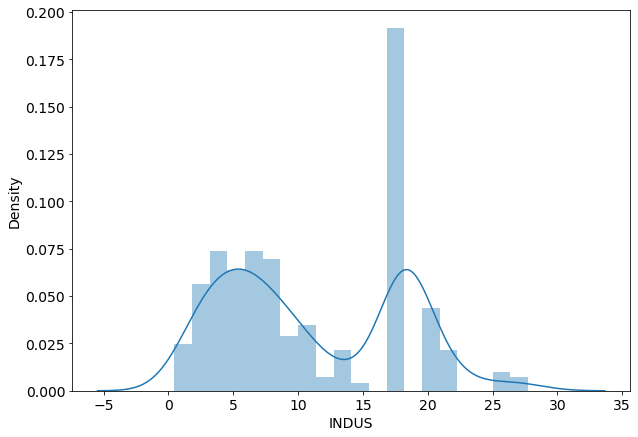

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


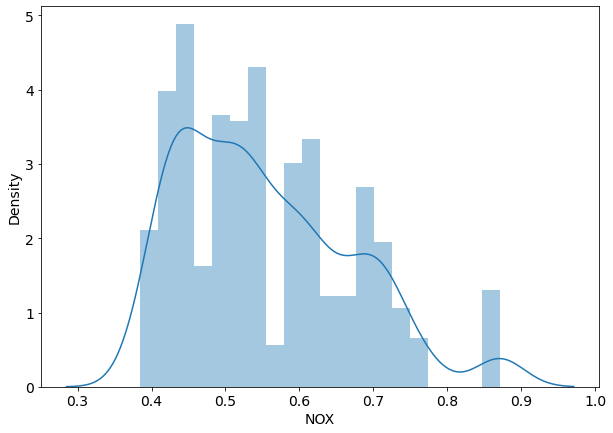

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


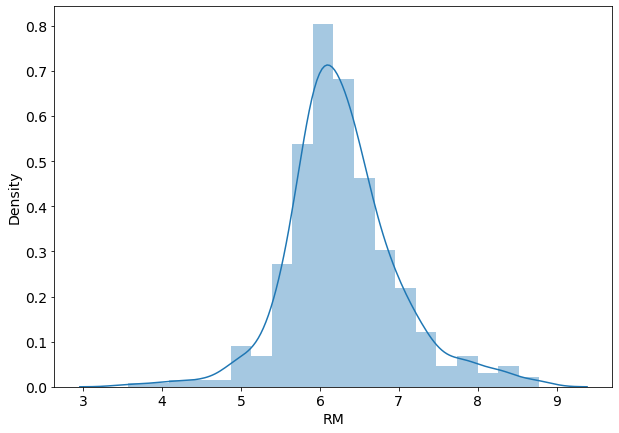

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


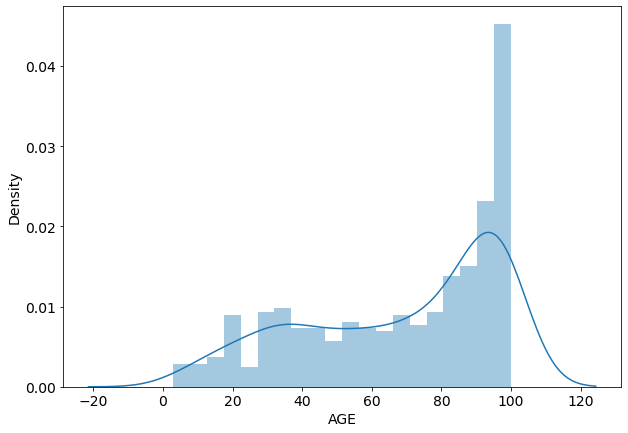

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


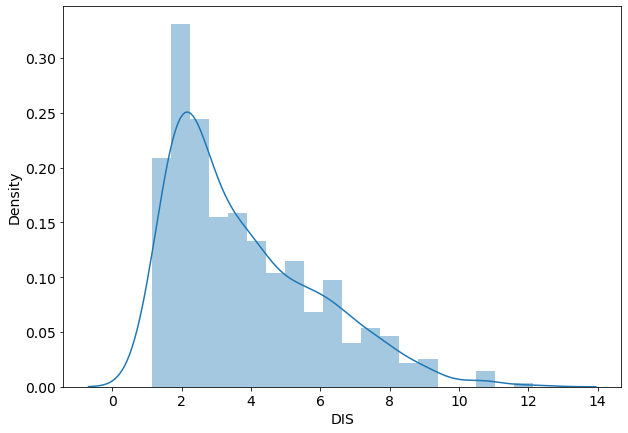

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


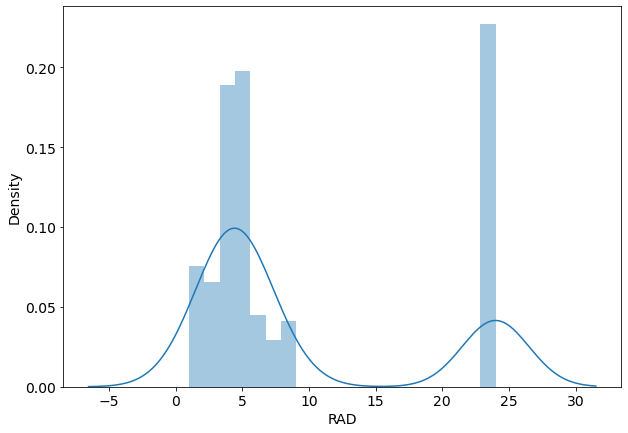

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


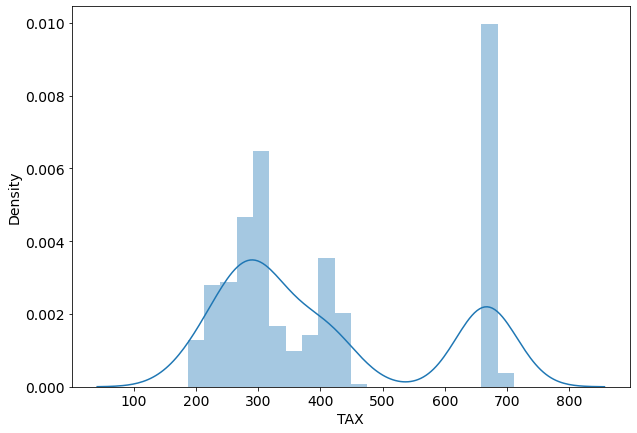

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


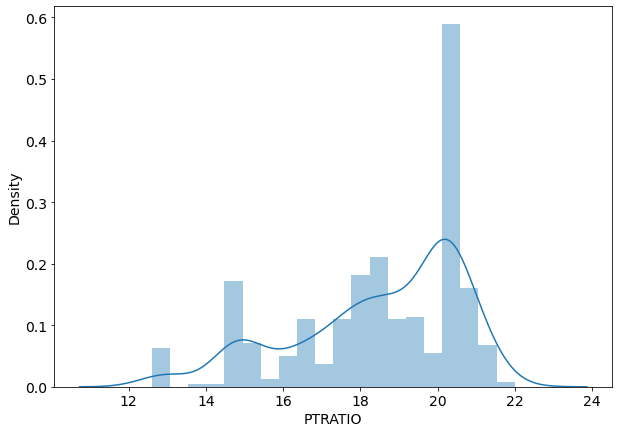

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


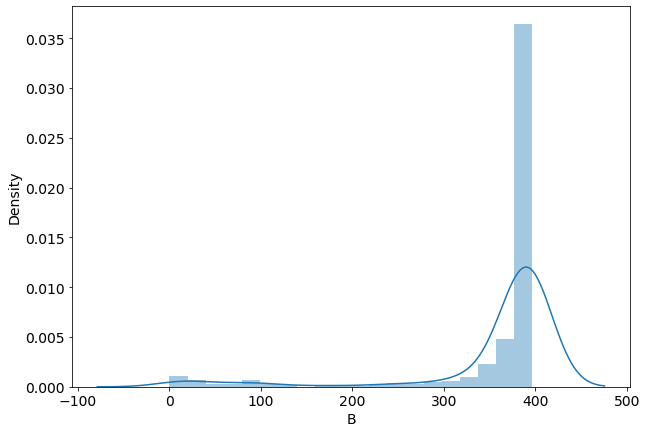

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


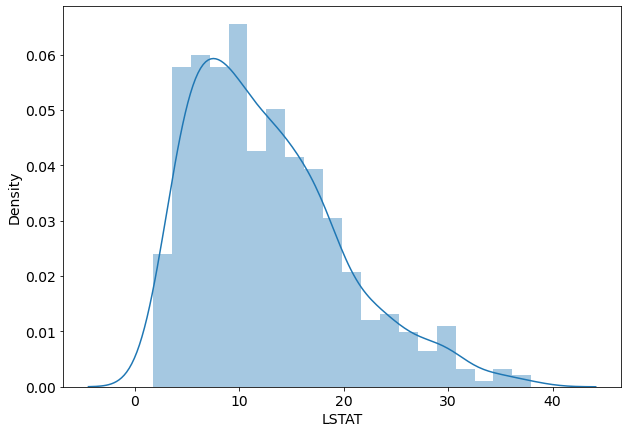

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


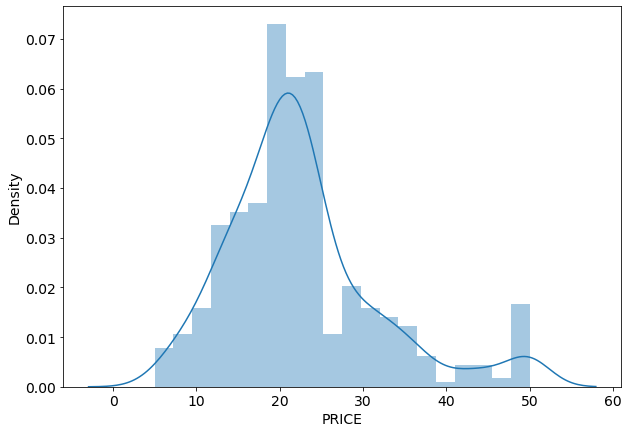

In [13]:
for feat in features:
  plt.figure(figsize=[10, 7])
  sns.distplot(df[feat], bins=20)
  plt.show()

> Оценка характера зависимости целевой функции от каждой переменной



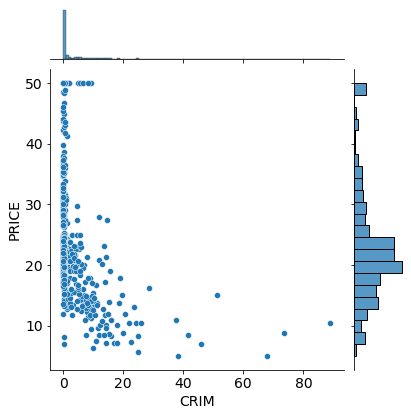

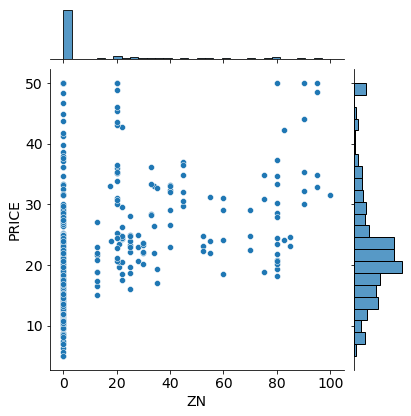

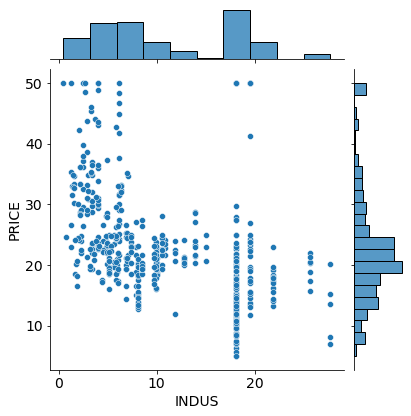

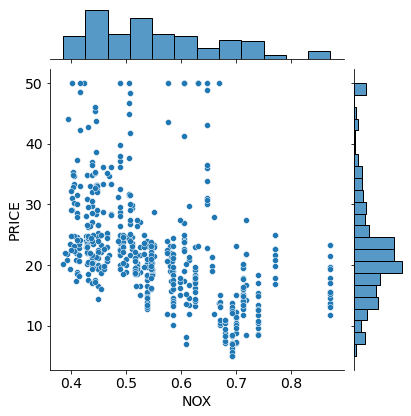

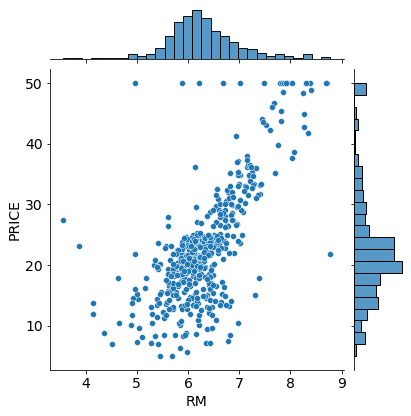

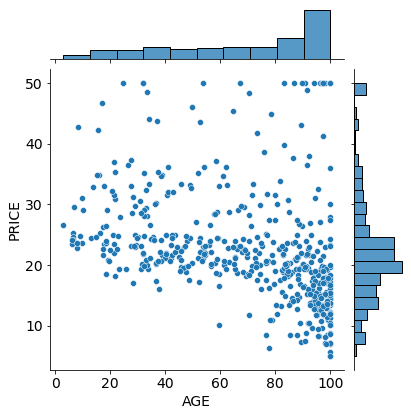

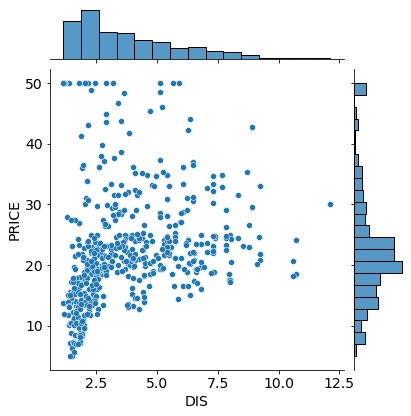

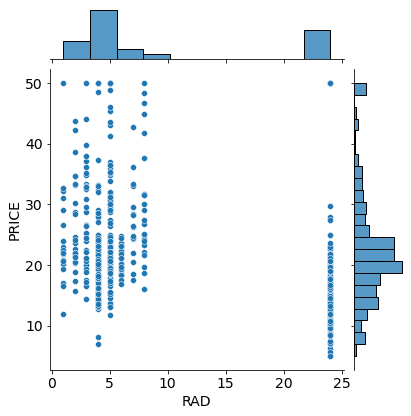

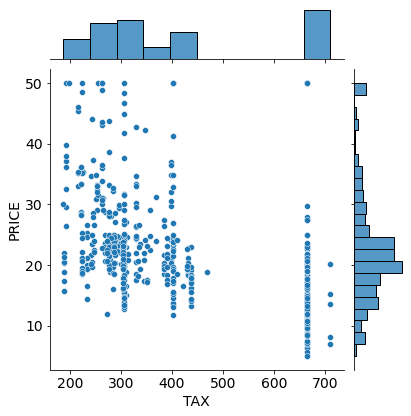

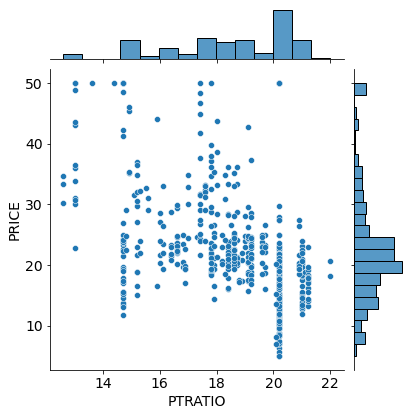

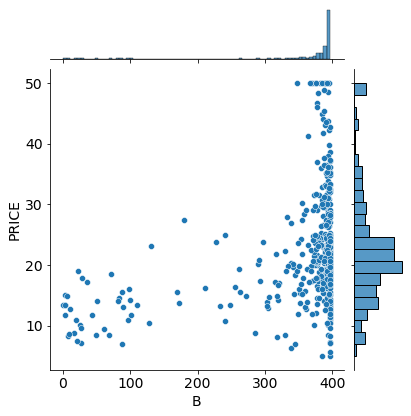

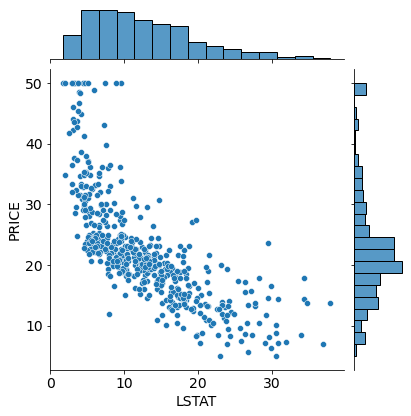

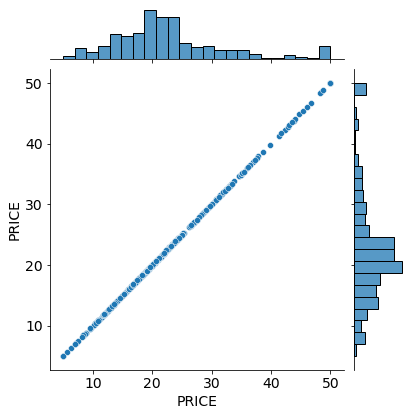

In [14]:
for feat in features:
  sns.jointplot(x=feat, y="PRICE", data=df)



> Выводы по результатам анализа



На основе расширенного анализа можно сделать вывод, что требуется корректировка распределений практически по всем независимым переменным. Так же необходино удалить выбросы в данных, и для некоторых переменных полиномиальные свойства.

# Работа с инструментами нормализации данных

In [15]:
# функция для отображения весов
def show_linear_model_weights(model, feature_names):
    '''
    Отображение весов
    Аргументы:
        model - модель линейной регрессии
        feature_names - отображение весов вместе с именами признаков
    '''
    print('\n----- Weights -----')
    weights = model.coef_
    bias = model.intercept_
    # Функция zip() делает из двух списков один список пар значений
    pairs = zip(feature_names, weights)#
    for pair in pairs:
        print(f'{pair[0]} | {pair[1]}')
    print(f'Bias: {bias}')


----- Weights -----
CRIM | -1.108346015417754
ZN | 0.8084399775400835
INDUS | 0.3431346557047933
CHAS | 0.8138642573885838
NOX | -1.7980429490588932
RM | 2.9138579955497654
AGE | -0.2989391755039209
DIS | -2.9425114769806915
RAD | 2.094193030043761
TAX | -1.447067312811984
PTRATIO | -2.05232232408682
B | 1.0237518746405991
LSTAT | -3.8857900211493894
Bias: 23.01581920903955

----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.3568267821682065

----- Evaluation for test -----
  R2: 0.7112260057484932
  RMSE: 4.638689926172821
  MAE: 3.162709871457406


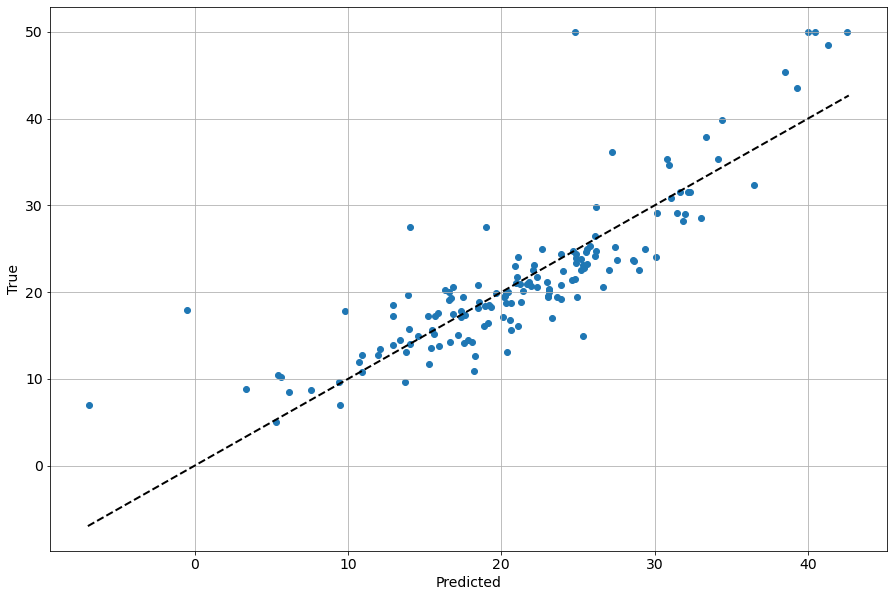

In [16]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
reg = LinearRegression()
# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Weights -----
CRIM | -11.874453326332448
ZN | 3.4018467913571957
INDUS | 1.3138357776880198
CHAS | 3.1198351162853952
NOX | -7.492691595119078
RM | 19.949248622000347
AGE | -1.0507030964564752
DIS | -15.24168408021582
RAD | 5.5827288159117545
TAX | -4.559970807607127
PTRATIO | -8.560440956236727
B | 4.677310480676527
LSTAT | -19.82738645674022
Bias: 26.028229324073685

----- Evaluation for train -----
  R2: 0.7434997532004697
  RMSE: 4.748208239685937
  MAE: 3.3568267821682047

----- Evaluation for test -----
  R2: 0.7112260057484927
  RMSE: 4.638689926172824
  MAE: 3.1627098714574067


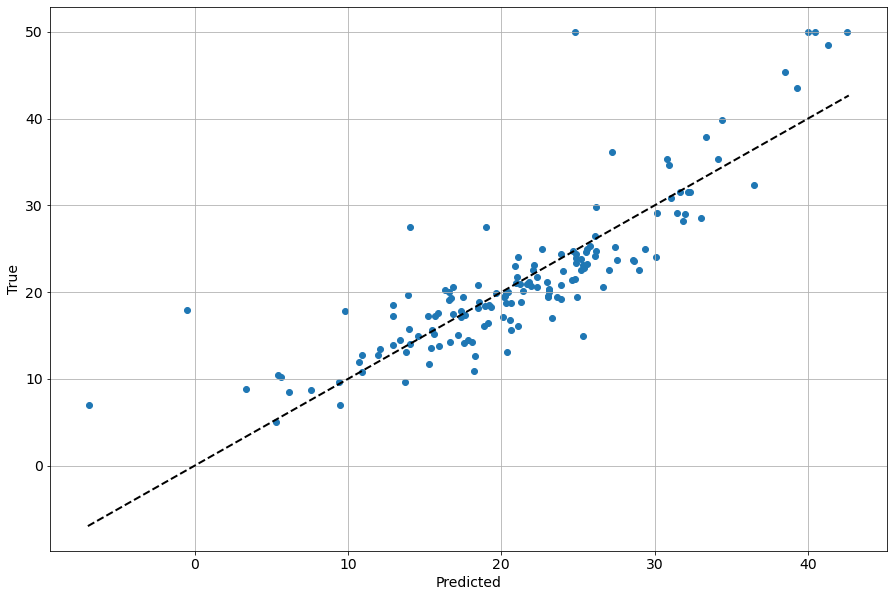

In [17]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg = LinearRegression()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)
# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')

Использование инструментов нормализации не дало существенного улучшения метрик, однако значительно изменились веса.

# Работа с инструментами выравнивания распределений

In [ ]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer();
reg = LinearRegression();
# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)
# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')
for feat in range(13):
  plt.figure(figsize=[5, 3])
  sns.distplot(X_train_scaled[feat], bins=20)
  plt.title(feature_names[feat])
  plt.show()

In [ ]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(n_quantiles=100,output_distribution='normal');
reg = LinearRegression();
# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)
# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')
for feat in range(13):
  plt.figure(figsize=[5, 3])
  sns.distplot(X_train_scaled[feat], bins=20)
  plt.title(feature_names[feat])
  plt.show()

Использование PowerTransformer дает лучший по R2 метрике результат. Уменьшение числа квантилей в QuantileTransformer привело к улучшение метрик на тестой выборке.

# Исключение выбросов

        CRIM    ZN  INDUS CHAS    NOX  ...  RAD    TAX  PTRATIO       B  LSTAT
0    0.00632  18.0   2.31    0  0.538  ...  1.0  296.0     15.3  396.90   4.98
1    0.02731   0.0   7.07    0  0.469  ...  2.0  242.0     17.8  396.90   9.14
2    0.02729   0.0   7.07    0  0.469  ...  2.0  242.0     17.8  392.83   4.03
3    0.03237   0.0   2.18    0  0.458  ...  3.0  222.0     18.7  394.63   2.94
4    0.06905   0.0   2.18    0  0.458  ...  3.0  222.0     18.7  396.90   5.33
..       ...   ...    ...  ...    ...  ...  ...    ...      ...     ...    ...
501  0.06263   0.0  11.93    0  0.573  ...  1.0  273.0     21.0  391.99   9.67
502  0.04527   0.0  11.93    0  0.573  ...  1.0  273.0     21.0  396.90   9.08
503  0.06076   0.0  11.93    0  0.573  ...  1.0  273.0     21.0  396.90   5.64
504  0.10959   0.0  11.93    0  0.573  ...  1.0  273.0     21.0  393.45   6.48
505  0.04741   0.0  11.93    0  0.573  ...  1.0  273.0     21.0  396.90   7.88

[490 rows x 13 columns] 0      24.0
1      21.6
2  

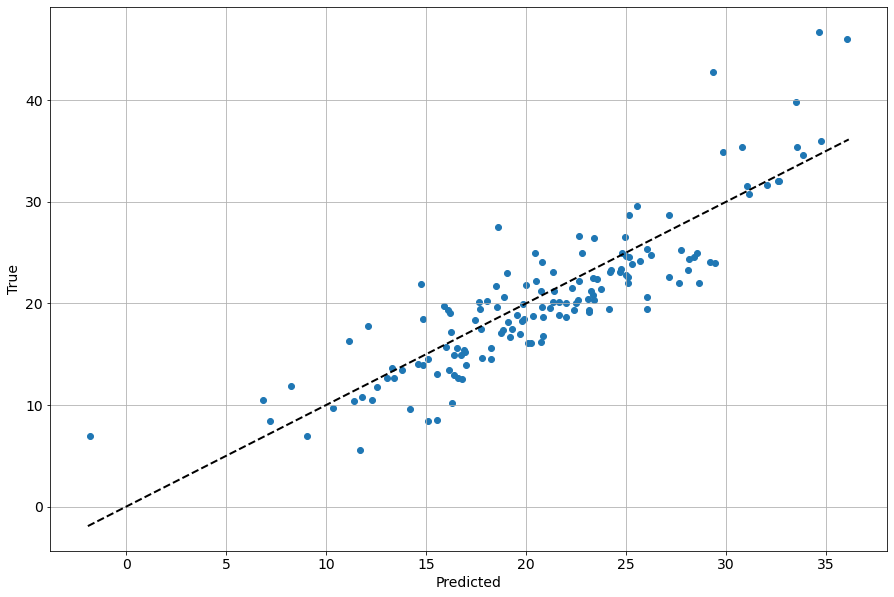

In [20]:
df_cor=df[df['PRICE'] < 50]
TRAIN_RATIO = 0.7

# X - DataFrame только с признаками (для примера берем все признаки)
X = df_cor[feature_names]
# y - истинные значения (разметка)
y = df_cor['PRICE']
print(X,y)
X_train_cor, X_test_cor, y_train_cor, y_test_cor = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE
)
reg = LinearRegression();
reg.fit(X_train_cor, y_train_cor)
show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_cor)
draw_predictions_plot(y_pred, y_test_cor)

evaluate_regressor(reg, X_train_cor, y_train_cor, 'train')
evaluate_regressor(reg, X_test_cor, y_test_cor, 'test')

# Поочередное исключение всех признаков

In [21]:
def eval_reg_out(reg, X, y, mode):
    y_pred = reg.predict(X)
    r2_score_value = r2_score(y, y_pred)
    rmse_score = np.sqrt(mean_squared_error(y, y_pred))
    mae_score = mean_absolute_error(y, y_pred)
    return r2_score_value, rmse_score, mae_score

In [22]:
y = df['PRICE']
df_res = pd.DataFrame(columns = ['R2_train', 'RMSE_train', 'MAE_train','R2_test', 'RMSE_test', 'MAE_test'], 
                      index=list(feature_names))
for fear in feature_names:
  X = df.drop(columns=[fear, 'PRICE'])
  X_train_cor, X_test_cor, y_train_cor, y_test_cor = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE)
  reg = LinearRegression();
  reg.fit(X_train_cor, y_train_cor)
  y_pred = reg.predict(X_test_cor)
  df_res.loc[fear,['R2_train', 'RMSE_train', 'MAE_train']]=eval_reg_out(reg, X_train_cor, y_train_cor, 'train')
  df_res.loc[fear,['R2_test', 'RMSE_test', 'MAE_test']]=eval_reg_out(reg, X_test_cor, y_test_cor, 'test')
df_res

,R2_train,RMSE_train,MAE_train,R2_test,RMSE_test,MAE_test
CRIM,0.735429,4.82233,3.3952,0.715061,4.60778,3.13734
ZN,0.740394,4.77686,3.39217,0.697831,4.74505,3.24995
INDUS,0.743151,4.75144,3.3615,0.71241,4.62917,3.14422
CHAS,0.736665,4.81105,3.37897,0.708814,4.65802,3.20433
NOX,0.735551,4.82122,3.36302,0.690537,4.80198,3.23687
RM,0.693006,5.19458,3.72381,0.683052,4.85971,3.49986
AGE,0.74316,4.75135,3.36037,0.713868,4.61742,3.12911
DIS,0.718693,4.97251,3.49345,0.670199,4.95726,3.33199
RAD,0.736878,4.80911,3.36305,0.688301,4.8193,3.28564
TAX,0.740817,4.77298,3.36438,0.698385,4.7407,3.24129


# Полиномиальные свойство


----- Weights -----
0 | -0.15280616090498653
1 | 0.02008920443439443
2 | 0.06774065481869344
3 | 2.6057394717883113
4 | -14.010539660889783
5 | 3.0828754394175246
6 | 0.010937689839601488
7 | -1.1883620995490953
8 | 0.25074012252115635
9 | -0.008665054355744092
10 | -0.7955990628936107
11 | 0.00947021171891732
12 | 1.3322676295501878e-14
13 | -1.7631869370583861
14 | 0.03384968389156649
Bias: 41.667234450470374

----- Evaluation for train -----
  R2: 0.7900154484992744
  RMSE: 4.296150987499626
  MAE: 3.103043927750793

----- Evaluation for test -----
  R2: 0.7734457360506537
  RMSE: 4.108680995278827
  MAE: 2.9527724878930814


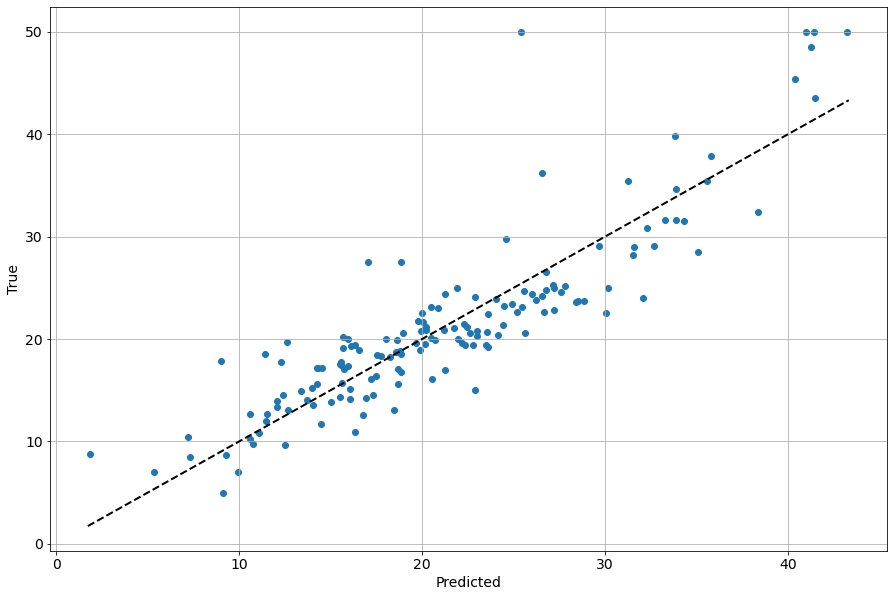

In [23]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2)
reg = LinearRegression();
# "Обучение" трансформера - определение параметров средних и отклонений
poly.fit(np.array(X_train['LSTAT']).reshape(-1, 1))
# Стандартизация данных
X_train_scaled = poly.transform(np.array(X_train['LSTAT']).reshape(-1, 1))
X_test_scaled = poly.transform(np.array(X_test['LSTAT']).reshape(-1, 1))
X_train_scaled = np.concatenate((np.array(X_train.drop(columns=['LSTAT'])), X_train_scaled), axis=1) 
X_test_scaled = np.concatenate((np.array(X_test.drop(columns=['LSTAT'])), X_test_scaled), axis=1) 

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, range(15))
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')

Использование PolynomialFeatures значительно улучшило результаты обучения модели.

# Модель Ридж регрессии

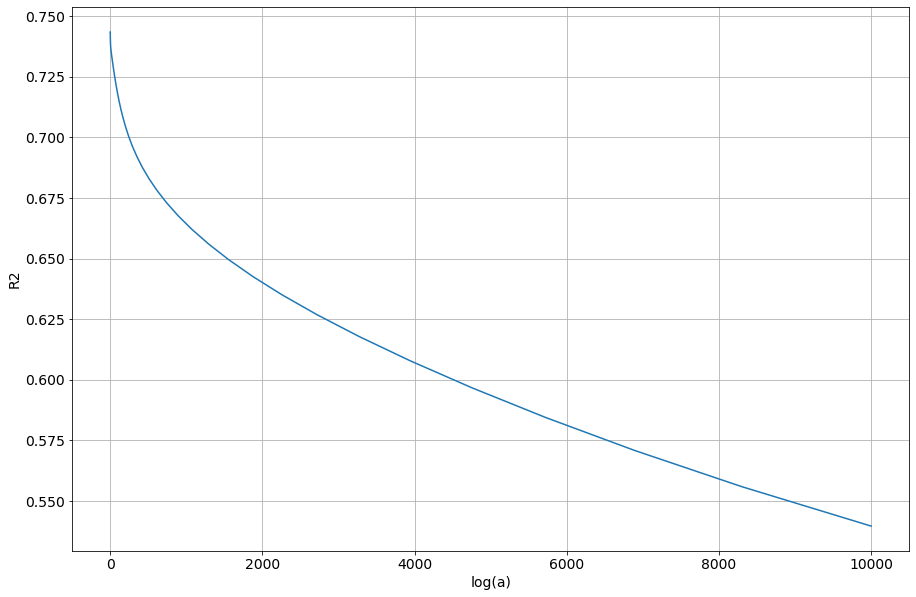

In [24]:
from sklearn.linear_model import Ridge
R2_val = []
log_sp=np.logspace(-4,4,100)
for a in log_sp:
  reg = Ridge(alpha=a);
  reg.fit(X_train, y_train)
  #show_linear_model_weights(reg, X_train.columns)
  y_pred = reg.predict(X_test)
  #draw_predictions_plot(y_pred, y_test)
  #evaluate_regressor(reg, X_train, y_train, 'train')
  #evaluate_regressor(reg, X_test, y_test, 'test')
  R2_val.append(eval_reg_out(reg, X_train, y_train, 'train')[0])
plt.plot(log_sp,R2_val)
plt.xlabel('log(a)')
plt.ylabel('R2')
plt.grid()
plt.show()



> Инструменты нормализации




----- Evaluation for train -----
  R2: 0.743482391414018
  RMSE: 4.748368933454408
  MAE: 3.3520641215891938

----- Evaluation for test -----
  R2: 0.7108071617209415
  RMSE: 4.6420527351841026
  MAE: 3.161026516515537


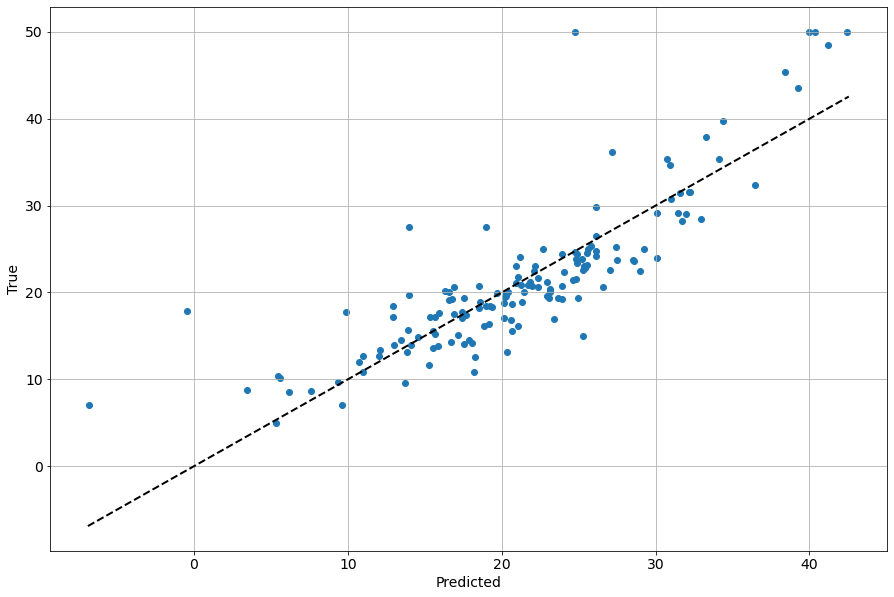

In [25]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
reg = Ridge()
# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)

# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
#show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')

In [26]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
reg = Ridge()

# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)
# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
#show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
#draw_predictions_plot(y_pred, y_test)
evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7387251833812362
  RMSE: 4.792196740950352
  MAE: 3.3491646276433173

----- Evaluation for test -----
  R2: 0.711020981158772
  RMSE: 4.640336329192624
  MAE: 3.1087318709305003




> Работа с инструментами выравнивания распределений



In [27]:
from sklearn.preprocessing import PowerTransformer
scaler = PowerTransformer();
reg = Ridge();
# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)
# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

reg.fit(X_train_scaled, y_train)
#show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
#draw_predictions_plot(y_pred, y_test)

evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7671538602313817
  RMSE: 4.523976964245666
  MAE: 3.342412393327308

----- Evaluation for test -----
  R2: 0.740795451130297
  RMSE: 4.394784786716414
  MAE: 3.157433953239507


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2982: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [28]:
from sklearn.preprocessing import QuantileTransformer
scaler = QuantileTransformer(output_distribution='normal');
reg = Ridge();
# "Обучение" трансформера - определение параметров средних и отклонений
scaler.fit(X_train)
# Стандартизация данных
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
reg.fit(X_train_scaled, y_train)
#show_linear_model_weights(reg, X_train.columns)
y_pred = reg.predict(X_test_scaled)
#draw_predictions_plot(y_pred, y_test)

evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')


----- Evaluation for train -----
  R2: 0.7554087270965972
  RMSE: 4.636671652497528
  MAE: 3.4579297420340493

----- Evaluation for test -----
  R2: 0.7464912158226579
  RMSE: 4.346231041109075
  MAE: 3.178893310311777


/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_data.py:2357: UserWarning: n_quantiles (1000) is greater than the total number of samples (354). n_quantiles is set to n_samples.
  % (self.n_quantiles, n_samples))


# Лучщая модель

In [ ]:
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import PolynomialFeatures
df = df[df['PRICE']<50]
X = df[feature_names]
# y - истинные значения (разметка)
y = df['PRICE']

X_train, X_test, y_train, y_test = train_test_split(
    # Передаются наборы, которые будут разделены в соответсвии с параметрами
    X, y, 
    # Задается размер обучающей выборки
    train_size=TRAIN_RATIO, 
    # Фиксируется состояние генератора случайных чисел 
    #   для сохранения повторяемости
    random_state=RANDOM_STATE
)

scaler1 = MinMaxScaler()
reg = Ridge(alpha=0.001);
# "Обучение" трансформера - определение параметров средних и отклонений

poly = PolynomialFeatures(degree = 2)
# "Обучение" трансформера - определение параметров средних и отклонений
poly.fit(np.array(X_train['LSTAT']).reshape(-1, 1))
# Стандартизация данных
X_train_scaled = poly.transform(np.array(X_train['LSTAT']).reshape(-1, 1))
X_test_scaled = poly.transform(np.array(X_test['LSTAT']).reshape(-1, 1))
X_train_scaled = np.concatenate((np.array(X_train.drop(columns=['LSTAT'])), X_train_scaled), axis=1) 
X_test_scaled = np.concatenate((np.array(X_test.drop(columns=['LSTAT'])), X_test_scaled), axis=1) 

scaler1.fit(X_train_scaled)
# Стандартизация данных
X_train_scaled = scaler1.transform(X_train_scaled)
X_test_scaled = scaler1.transform(X_test_scaled)

reg.fit(X_train_scaled, y_train)
show_linear_model_weights(reg, range(14))
y_pred = reg.predict(X_test_scaled)
draw_predictions_plot(y_pred, y_test)

evaluate_regressor(reg, X_train_scaled, y_train, 'train')
evaluate_regressor(reg, X_test_scaled, y_test, 'test')

При таком наборе данных использование в совокумности MinMaxScaler, Ридж регрессии с а=0.001, с удалением выбросов и применении PolynomialFeature для LSTAT позволило сущеественно увеличить R2 метрику.

# Вопросы

- Какую задачу выполняет `QuantileTransformer`? Нужен для начальной обработкию Приводит распределение к единому или нормальному, при этом убирая выбросы.
- За что отвечает аргумент конструктора `output_distribution` класса `QuantileTransformer`? Определяет, какое будет распределения у выходных данных.
- В чем отличие Ридж регрессии от линейной регрессии? В Ридж регресси присутствует член связанный с нормой весов, что не дает им сильно отклоняться.
- Что такое регуляризация? Минимизация с учетом значения весов.
- Как сказывается станартизация данных на результатах обучения с использованием регуляризации? С имеющимися данными результат (R2) не изменится с линейной регрессией, и он хуже, чем при с MinMaxScaler.
- Как сказывается применение `QuantileTransformer` на результатах обучения с использованием регуляризации? С имеющимися данными результат (R2) не изменился в сравнении с линейной регрессией, однако он лучше, чем MinMaxScaler и StandardScaler.
- Как влияет значение $\alpha$ на результаты обучения Ридж регрессии? С уменьшением $\alpha$, увеличивеется R2 метрика.